# Capstone Project 1-Data Story

## 1. Introduction

### The problem:

Based on sales observations in a retail store during Black Friday, make decisions on strategy of targeted advertising. For a specific group of people, predict the categories of products they are most likely to buy and include the categories in the advertising email or other advertising method.

### The dataset:

The raw data files in this project are acquired from Kaggle at https://www.kaggle.com/mehdidag/black-friday.

The raw csv file is BlackFriday.csv. The file includes dataset of 537,577 observations about the balck Friday in a retail store. It contains different kinds of variables either numerical or categorical including custormer information and purchase information. The variables include 'User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase'.

The raw dataset has been imported and cleaned up into blackfriday_clean.csv. The variables in the file include 'user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category', 'stay_in_current_city_years', 'marital_status', 'product_category_1', 'product_category_2', 'product_category_3', 'purchase', 'product_category_num'.

### The questions of interest:

$\bullet$ How do purchase amounts vary among different genders, among different ages, among different cities, among different marital statuses?

$\bullet$ How do purchase amounts vary among different years staying in current city?

$\bullet$ Rank the product category among different genders, among different ages, among different cities, among different marital statuses? 


## 2. Import modules and datasets
### 1) Import relevant modules:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) Import dataset:

In [3]:
df=pd.read_csv('blackfriday_clean.csv',index_col=0)
print(df.head(1))

   user_id product_id gender   age  occupation city_category  \
0  1000001  P00069042      F  0-17          10             A   

  stay_in_current_city_years  marital_status  product_category_1  \
0                          2               0                   3   

   product_category_2  product_category_3  purchase  product_category_num  
0                   0                   0      8370                     1  


## 3. Purchase amounts variation among genders

To understand how purchase amounts vary with genders, purchase amounts are investigated from two perspectives:

$\bullet$ Histograms are plotted to show purchase amount distributions by genders;

$\bullet$ Cumulative density function and boxplot are also plotted to provide quantitative comparisons among genders. 

### 1) Compare purchase amounts among genders

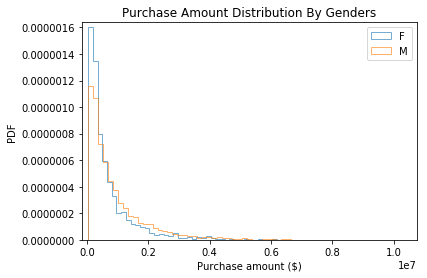

In [4]:
pa_by_gender=df.pivot_table(values='purchase',index='user_id',columns='gender',aggfunc=np.sum)

for gender in pa_by_gender.columns:
    series=pa_by_gender[gender].dropna()
    n_bins=int(np.sqrt(len(series)))
    _=plt.hist(series,bins=n_bins,density='True',histtype='step',alpha=0.6)
    
_=plt.xlabel('Purchase amount ($)')
_=plt.ylabel('PDF')
_=plt.title('Purchase Amount Distribution By Genders')
_=plt.legend(pa_by_gender.columns,loc='upper right')
plt.margins(0.02)
plt.show()

### 2) Compare cumulative purchase amounts among genders 

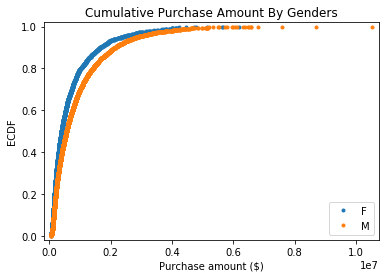

In [5]:
def ecdf(array):
    x=np.sort(array)
    y=np.arange(1,len(x)+1)/len(x)
    return x,y

for gender in pa_by_gender.columns:
    series=pa_by_gender[gender].dropna()
    x,y=ecdf(series)
    _=plt.plot(x,y,marker='.',linestyle='none')
    
_=plt.xlabel('Purchase amount ($)')
_=plt.ylabel('ECDF')
_=plt.title('Cumulative Purchase Amount By Genders')
_=plt.legend(pa_by_gender.columns,loc='lower right')
plt.margins(0.02)
plt.show()

### 3) Summary statistics and boxplots by genders

In [6]:
pa_by_gender.describe()

gender,F,M
count,1.666000e+03,4.225000e+03
mean,6.990540e+05,9.119632e+05
std,7.957381e+05,9.753978e+05
min,4.410800e+04,4.555100e+04
25%,2.002452e+05,2.546740e+05
50%,3.981780e+05,5.659250e+05
75%,8.637568e+05,1.193530e+06
max,6.186498e+06,1.053678e+07


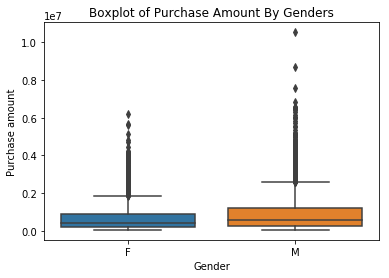

In [7]:
_=sns.boxplot(data=pa_by_gender)
_=plt.xlabel('Gender')
_=plt.ylabel('Purchase amount')
_=plt.title('Boxplot of Purchase Amount By Genders')

### 4) Summary

Totally, there are 5891 users, among them 1666 are females, 4225 are males. The number of male users is about 2.5 times the number of female users.

The mean of purchase amount by male is about 1.3 times that by female. The median of purchase amount by male is about 1.4 time that by female.

## 4. Purchase amounts variation among ages

To understand how purchase amounts vary with ages, purchase amounts are investigated from two perspectives:

$\bullet$ Histograms are plotted to show purchase amount distributions by ages;

$\bullet$ Cumulative density function and boxplot are also plotted to provide quantitative comparisons among ages. 

### 1) Compare purchase amounts among ages

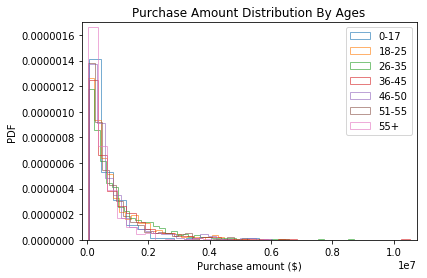

In [8]:
pa_by_age=df.pivot_table(values='purchase',index='user_id',columns='age',aggfunc=np.sum)

for age in pa_by_age.columns:
    series=pa_by_age[age].dropna()
    n_bins=int(np.sqrt(len(series)))
    _=plt.hist(series,bins=n_bins,density='True',histtype='step',alpha=0.6)
    
_=plt.xlabel('Purchase amount ($)')
_=plt.ylabel('PDF')
_=plt.title('Purchase Amount Distribution By Ages')
_=plt.legend(pa_by_age.columns,loc='upper right')
plt.margins(0.02)
plt.show()

### 2) Compare cumulative purchase amounts among ages 

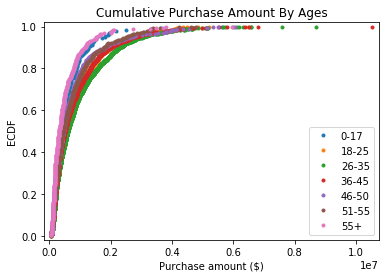

In [9]:
for age in pa_by_age.columns:
    series=pa_by_age[age].dropna()
    x,y=ecdf(series)
    _=plt.plot(x,y,marker='.',linestyle='none')
    
_=plt.xlabel('Purchase amount ($)')
_=plt.ylabel('ECDF')
_=plt.title('Cumulative Purchase Amount By Ages')
_=plt.legend(pa_by_age.columns,loc='lower right')
plt.margins(0.02)
plt.show()

### 3) Summary statistics and boxplots by ages

In [10]:
pa_by_age.describe()

age,0-17,18-25,26-35,36-45,46-50,51-55,55+
count,2.180000e+02,1.069000e+03,2.053000e+03,1.167000e+03,5.310000e+02,4.810000e+02,3.720000e+02
mean,6.085276e+05,8.434699e+05,9.740619e+05,8.660236e+05,7.785654e+05,7.524082e+05,5.312227e+05
std,6.751607e+05,8.787495e+05,1.019681e+06,9.717466e+05,9.173907e+05,7.834689e+05,6.110050e+05
min,7.590600e+04,4.607000e+04,4.443200e+04,5.590000e+04,6.225000e+04,4.555100e+04,4.410800e+04
25%,1.889272e+05,2.454890e+05,2.558660e+05,2.441670e+05,2.264920e+05,2.308950e+05,1.756450e+05
50%,4.045175e+05,5.365670e+05,6.069520e+05,5.121740e+05,4.617040e+05,4.432010e+05,3.265740e+05
75%,7.738108e+05,1.098464e+06,1.313679e+06,1.132586e+06,9.287610e+05,9.800680e+05,6.743270e+05
max,5.628295e+06,6.476786e+06,8.699232e+06,1.053678e+07,6.044178e+06,4.799323e+06,5.961987e+06


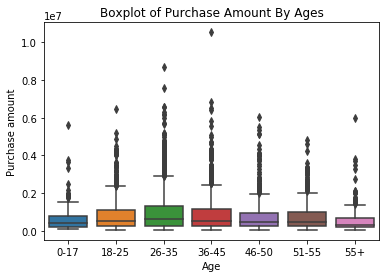

In [11]:
_=sns.boxplot(data=pa_by_age)
_=plt.xlabel('Age')
_=plt.ylabel('Purchase amount')
_=plt.title('Boxplot of Purchase Amount By Ages')

### 4) Summary

Age 26-35 has the largest number of customers. Age 0-17 has the smallest number of customers. The second least customers are in the age range of 55+. The number of 26-35 customers is 9.4 times that of 0-17 customers, 5.5 times that of 55+ customers.

The mean of purchase amounts by 26-35 customers is the largest, while the mean of purchase amounts by 55+ customers is the smallest.

The median of purchase amounts by 26-35 customers is the largest, while the median of purchase amounts by 55+ customers is the smallest.

## 5. Purchase amounts variation among cities

To understand how purchase amounts vary with cities, purchase amounts are investigated from two perspectives:

$\bullet$ Histograms are plotted to show purchase amount distributions by cities;

$\bullet$ Cumulative density function and boxplot are also plotted to provide quantitative comparisons among cities. 

### 1) Compare purchase amounts among cities

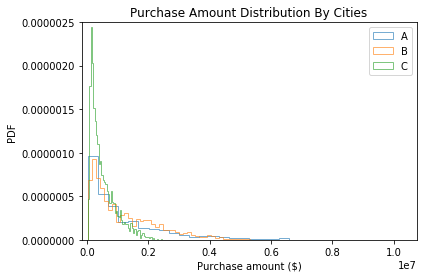

In [12]:
pa_by_city=df.pivot_table(values='purchase',index='user_id',columns='city_category',aggfunc=np.sum)

for city in pa_by_city.columns:
    series=pa_by_city[city].dropna()
    n_bins=int(np.sqrt(len(series)))
    _=plt.hist(series,bins=n_bins,density='True',histtype='step',alpha=0.6)
    
_=plt.xlabel('Purchase amount ($)')
_=plt.ylabel('PDF')
_=plt.title('Purchase Amount Distribution By Cities')
_=plt.legend(pa_by_city.columns,loc='upper right')
plt.margins(0.02)
plt.show()

### 2) Compare cumulative purchase amounts among cities 

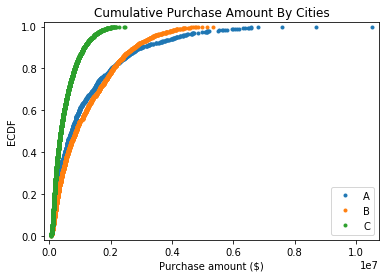

In [13]:
for city in pa_by_city.columns:
    series=pa_by_city[city].dropna()
    x,y=ecdf(series)
    _=plt.plot(x,y,marker='.',linestyle='none')
    
_=plt.xlabel('Purchase amount ($)')
_=plt.ylabel('ECDF')
_=plt.title('Cumulative Purchase Amount By Cities')
_=plt.legend(pa_by_city.columns,loc='lower right')
plt.margins(0.02)
plt.show()

### 3) Summary statistics and boxplots by cities

In [14]:
pa_by_city.describe()

city_category,A,B,C
count,1.045000e+03,1.707000e+03,3.139000e+03
mean,1.239874e+06,1.220522e+06,5.220032e+05
std,1.362553e+06,1.054555e+06,4.227543e+05
min,4.555100e+04,4.443200e+04,4.410800e+04
25%,2.817800e+05,3.557245e+05,1.968935e+05
50%,7.301310e+05,8.733460e+05,3.780370e+05
75%,1.672669e+06,1.876029e+06,7.270770e+05
max,1.053678e+07,5.327346e+06,2.456078e+06


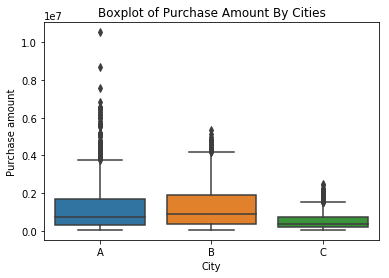

In [15]:
_=sns.boxplot(data=pa_by_city)
_=plt.xlabel('City')
_=plt.ylabel('Purchase amount')
_=plt.title('Boxplot of Purchase Amount By Cities')

### 4) Summary

City C has the largest number of customers but the mean or median of the purchase amount is the least. The number of customers of city C is about 1.8 times that of city B, 3 times that of city A. The mean purchase amount of city C is about 0.4 times that of city B or city A. The median purchase amount of city C is 0.4 times that of city B, 0.5 times that of city A.

City A has the smallest number of customers, but the largest purchase amounts occur in city A. City A and city B has similar mean value and similar median value. 

## 6. Purchase amounts variation among marital statuses

To understand how purchase amounts vary with marital statuses, purchase amounts are investigated from two perspectives:

$\bullet$ Histograms are plotted to show purchase amount distributions by marital statuses;

$\bullet$ Cumulative density function and boxplot are also plotted to provide quantitative comparisons among marital statuses. 

### 1) Compare purchase amounts among marital statuses

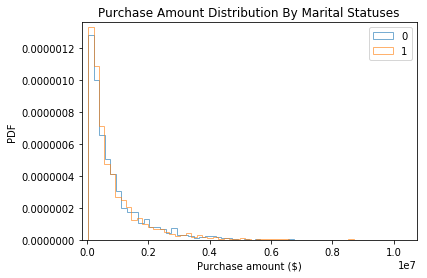

In [16]:
pa_by_status=df.pivot_table(values='purchase',index='user_id',columns='marital_status',aggfunc=np.sum)

for status in pa_by_status.columns:
    series=pa_by_status[status].dropna()
    n_bins=int(np.sqrt(len(series)))
    _=plt.hist(series,bins=n_bins,density='True',histtype='step',alpha=0.6)
    
_=plt.xlabel('Purchase amount ($)')
_=plt.ylabel('PDF')
_=plt.title('Purchase Amount Distribution By Marital Statuses')
_=plt.legend(pa_by_status.columns,loc='upper right')
plt.margins(0.02)
plt.show()

### 2) Compare cumulative purchase amounts among marital statuses 

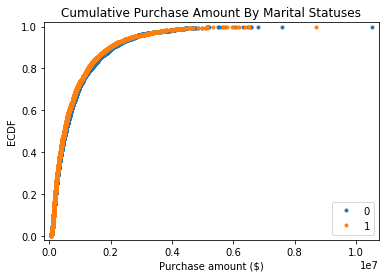

In [17]:
for status in pa_by_status.columns:
    series=pa_by_status[status].dropna()
    x,y=ecdf(series)
    _=plt.plot(x,y,marker='.',linestyle='none')
    
_=plt.xlabel('Purchase amount ($)')
_=plt.ylabel('ECDF')
_=plt.title('Cumulative Purchase Amount By Marital Statuses')
_=plt.legend(pa_by_status.columns,loc='lower right')
plt.margins(0.02)
plt.show()

### 3) Summary statistics and boxplots by marital statuses

In [18]:
pa_by_status.describe()

marital_status,0,1
count,3.417000e+03,2.474000e+03
mean,8.680976e+05,8.291750e+05
std,9.410755e+05,9.214375e+05
min,4.443200e+04,4.410800e+04
25%,2.393670e+05,2.312942e+05
50%,5.357920e+05,4.965680e+05
75%,1.116522e+06,1.076033e+06
max,1.053678e+07,8.699232e+06


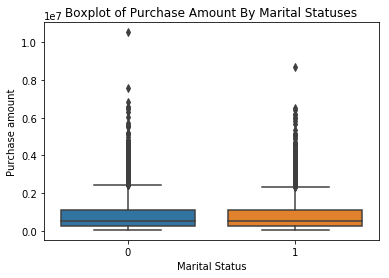

In [19]:
_=sns.boxplot(data=pa_by_status)
_=plt.xlabel('Marital Status')
_=plt.ylabel('Purchase amount')
_=plt.title('Boxplot of Purchase Amount By Marital Statuses')

### 4) Summary

Marital status 0 and 1 have very similar distributions and similar statistics.

## 7. Purchase amounts variation among years staying in current city

To understand how purchase amounts vary with years staying in current city, purchase amounts are investigated from two perspectives:

$\bullet$ Histograms are plotted to show purchase amount distributions by years staying in current city;

$\bullet$ Cumulative density function and boxplot are also plotted to provide quantitative comparisons among years staying in current city. 

### 1) Compare purchase amounts among years staying in current city

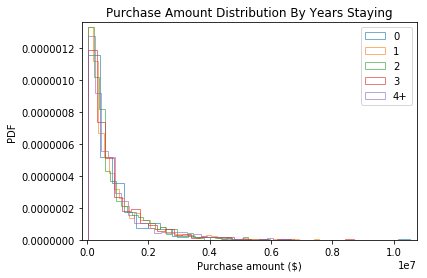

In [38]:
pa_by_years=df.pivot_table(values='purchase',index='user_id',columns='stay_in_current_city_years',aggfunc=np.sum)

for years in pa_by_years.columns:
    series=pa_by_years[years].dropna()
    n_bins=int(np.sqrt(len(series)))
    _=plt.hist(series,bins=n_bins,density='True',histtype='step',alpha=0.6)
    
_=plt.xlabel('Purchase amount ($)')
_=plt.ylabel('PDF')
_=plt.title('Purchase Amount Distribution By Years Staying')
_=plt.legend(pa_by_years.columns,loc='upper right')
plt.margins(0.02)
plt.show()

### 2) Compare cumulative purchase amounts among years staying in current city 

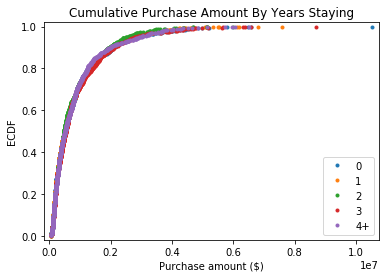

In [40]:
for years in pa_by_years.columns:
    series=pa_by_years[years].dropna()
    x,y=ecdf(series)
    _=plt.plot(x,y,marker='.',linestyle='none')
    
_=plt.xlabel('Purchase amount ($)')
_=plt.ylabel('ECDF')
_=plt.title('Cumulative Purchase Amount By Years Staying')
_=plt.legend(pa_by_years.columns,loc='lower right')
plt.margins(0.02)
plt.show()

### 3) Summary statistics and boxplots by years staying in current city

In [41]:
pa_by_years.describe()

stay_in_current_city_years,0,1,2,3,4+
count,7.720000e+02,2.086000e+03,1.145000e+03,9.790000e+02,9.090000e+02
mean,8.711210e+05,8.452751e+05,8.163115e+05,8.912473e+05,8.522676e+05
std,1.016661e+06,9.139840e+05,8.434174e+05,9.977810e+05,9.373054e+05
min,4.443200e+04,4.555100e+04,4.910400e+04,4.410800e+04,4.607000e+04
25%,2.292452e+05,2.326798e+05,2.394130e+05,2.380620e+05,2.435350e+05
50%,5.259885e+05,5.097190e+05,4.922350e+05,5.428070e+05,5.202030e+05
75%,1.065989e+06,1.115229e+06,1.092133e+06,1.132382e+06,1.075149e+06
max,1.053678e+07,7.577505e+06,5.985405e+06,8.699232e+06,6.511302e+06


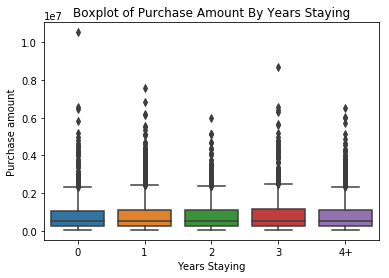

In [42]:
_=sns.boxplot(data=pa_by_years)
_=plt.xlabel('Years Staying')
_=plt.ylabel('Purchase amount')
_=plt.title('Boxplot of Purchase Amount By Years Staying')

### 4) Summary

For different years staying in current city, purchase amounts have very similar distributions and similar statistics. Possible reasons are the retail store is a chain store. It's easy for people living in different cities to get access.

## 8. Rank purchase amounts of different product categories by genders

### 1) Purchase amount comparison among different product categories by genders

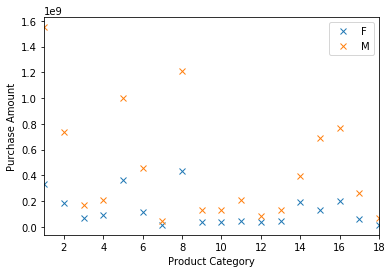

In [96]:
pc_by_gender=pd.melt(df,id_vars=['gender','purchase'],value_vars=['product_category_1','product_category_2','product_category_3'])
pc_by_gender_r=pc_by_gender.pivot_table(index='value',columns='gender',values='purchase',aggfunc=np.sum)
for gender in pc_by_gender_r.columns:
    _=plt.plot(pc_by_gender_r.index[1:],pc_by_gender_r[gender][1:],marker='x',linestyle='none')
 
plt.xlim(1,18)
_=plt.xlabel('Product Category')
_=plt.ylabel('Purchase Amount')
_=plt.legend(pc_by_gender_r.columns,loc='upper right')

### 2) Rank purchase amount for different product categories by genders

In [94]:
for gender in pc_by_gender_r.columns:
    print(pc_by_gender_r[1:].sort_values(by=gender,ascending=False)[gender])

value
8     435915604
5     359932845
1     331792660
16    200853458
14    195375887
2     187844366
15    132635419
6     115233359
4      91634657
3      68281895
17     61507118
11     48462721
13     41171384
10     39031022
9      38222008
12     37883321
7      16146938
18     14432077
Name: F, dtype: int64
value
1     1550873665
8     1214248205
5      999394184
16     766272186
2      737048486
15     686250150
6      454566466
14     391396263
17     261651181
4      211052452
11     209824146
3      172340341
13     134041842
10     129787779
9      127815837
12      84404075
18      70417090
7       48141770
Name: M, dtype: int64


### 3) Summary

Overall, rankings for different product categories are similar between females and males. 

For most product categories, purchase amount by males is slight larger than that by females.

For several product categories, purchase amount by males is much larger than that by females.

## 9. Rank purchase amounts of different product categories by ages

### 1) Purchase amount comparison among different product categories by ages

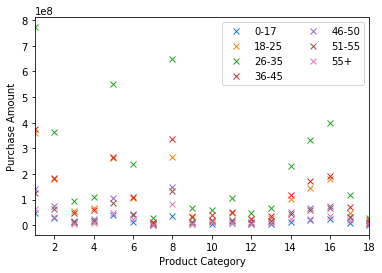

In [98]:
pc_by_age=pd.melt(df,id_vars=['age','purchase'],value_vars=['product_category_1','product_category_2','product_category_3'])
pc_by_age_r=pc_by_age.pivot_table(index='value',columns='age',values='purchase',aggfunc=np.sum)
for age in pc_by_age_r.columns:
    _=plt.plot(pc_by_age_r.index[1:],pc_by_age_r[age][1:],marker='x',linestyle='none')
 
plt.xlim(1,18)
_=plt.xlabel('Product Category')
_=plt.ylabel('Purchase Amount')
_=plt.legend(pc_by_age_r.columns,loc='upper right',ncol=2)

### 2) Rank purchase amount for different product categories by ages

In [99]:
for age in pc_by_age_r.columns:
    print(pc_by_age_r[1:].sort_values(by=age,ascending=False)[age])

value
1     47991135
5     41358395
8     33996380
2     27623638
16    25326890
15    20828292
4     17224453
14    14066165
3     12920277
6     11580551
11     7443435
17     7094471
9      5740707
12     4631877
13     3829082
10     3362912
18     1470104
7       858825
Name: 0-17, dtype: int64
value
1     358094787
8     267714310
5     261086977
16    179243293
2     178226939
15    143973003
6     106450187
14    100198202
4      68834265
3      55138404
11     49219124
17     49009698
9      35313757
13     27927894
12     22414458
10     20549675
18     12181454
7       8358459
Name: 18-25, dtype: int64
value
1     772524798
8     647047186
5     551218029
16    397846580
2     364054160
15    331894557
6     237523719
14    231283670
17    116464872
4     110299263
11    106033291
3      93019723
13     65510440
9      65317911
10     60023796
12     45486002
18     29246384
7      28426618
Name: 26-35, dtype: int64
value
1     374646337
8     336216805
5     266379235
16   

### 3) Summary

Overall, rankings for different product categories are similar among different ages. 

For several product categories, purchase amount by 26-35 customers is much larger than that by other ages. This is consistent with the total purchase amount comparison.

## 10. Rank purchase amounts of different product categories by cities

### 1) Purchase amount comparison among different product categories by cities

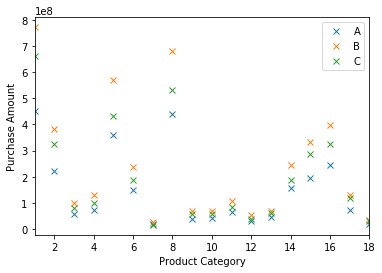

In [104]:
pc_by_city=pd.melt(df,id_vars=['city_category','purchase'],value_vars=['product_category_1','product_category_2','product_category_3'])
pc_by_city_r=pc_by_city.pivot_table(index='value',columns='city_category',values='purchase',aggfunc=np.sum)
for city in pc_by_city_r.columns:
    _=plt.plot(pc_by_city_r.index[1:],pc_by_city_r[city][1:],marker='x',linestyle='none')
 
plt.xlim(1,18)
_=plt.xlabel('Product Category')
_=plt.ylabel('Purchase Amount')
_=plt.legend(pc_by_city_r.columns,loc='upper right')

### 2) Rank purchase amount for different product categories by cities

In [105]:
for city in pc_by_city_r.columns:
    print(pc_by_city_r[1:].sort_values(by=city,ascending=False)[city])

value
1     451018860
8     438028158
5     359649470
16    246116770
2     220054736
15    196325076
14    156141652
6     148345899
17     73553086
4      73343588
11     65659865
3      58234965
13     45343780
10     43013477
9      38576145
12     31901078
7      20844315
18     20262745
Name: A, dtype: int64
value
1     771411492
8     681477527
5     568020834
16    397691957
2     381602509
15    333758057
14    243036302
6     235622279
17    131372826
4     130901842
11    108307340
3     101014539
13     70131231
9      68935122
10     67453863
12     53565310
18     35406250
7      27606195
Name: B, dtype: int64
value
1     660235973
8     530658124
5     431656725
16    323316917
2     323235607
15    288802436
14    187594196
6     185831647
17    118232387
4      98441679
11     84319662
3      81372732
13     59738215
9      58526578
10     58351461
12     36821008
18     29180172
7      15838198
Name: C, dtype: int64


### 3) Summary

Rankings of purchase amounts for different product categories are very similar for different cites.

For most product categories, difference of purchase amounts among cities is small.

For several product categories, difference of purchase amounts among cities is large.

## 11. Rank purchase amounts of different product categories by marital statuses

### 1) Purchase amount comparison among different product categories by marital statuses

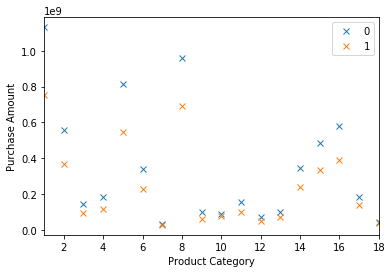

In [106]:
pc_by_status=pd.melt(df,id_vars=['marital_status','purchase'],value_vars=['product_category_1','product_category_2','product_category_3'])
pc_by_status_r=pc_by_status.pivot_table(index='value',columns='marital_status',values='purchase',aggfunc=np.sum)
for status in pc_by_status_r.columns:
    _=plt.plot(pc_by_status_r.index[1:],pc_by_status_r[status][1:],marker='x',linestyle='none')
 
plt.xlim(1,18)
_=plt.xlabel('Product Category')
_=plt.ylabel('Purchase Amount')
_=plt.legend(pc_by_status_r.columns,loc='upper right')

### 2) Rank purchase amount for different product categories by marital statuses

In [107]:
for status in pc_by_status_r.columns:
    print(pc_by_status_r[1:].sort_values(by=status,ascending=False)[status])

value
1     1131019710
8      956988408
5      812358034
16     578343530
2      556351623
15     485557012
14     343916804
6      341058828
4      185786416
17     184490090
11     157098606
3      147089391
9      102019934
13     100525940
10      91828336
12      71505609
18      47883077
7       35420752
Name: 0, dtype: int64
value
1     751646615
8     693175401
5     546968995
16    388782114
2     368541229
15    333328557
14    242855346
6     228740997
17    138668209
4     116900693
11    101188261
3      93532845
10     76990465
13     74687286
9      64017911
12     50781787
18     36966090
7      28867956
Name: 1, dtype: int64


### 3) Summary

Rankings of purchase amounts for different product categories are very similar for different marital statuses.

Overall, purchase amount of single customers for different product categories is larger than that of married customers.

For most product categories, purchase amounts are similar between married customers and single customers. For several product categories, purchase amount of single customers is obviously larger than that of married customers.
